# House Prices Dataset
---
**Name:** Ronald Wanjohi Gachoka <br>
**Student Number:** S2274825 <br>
**Course:** Software Development for Data Science <br>
**Assignment:** Coursework 1 <br>
**Program:** MSc Financial Technology 

## 1. Overview

This main objective of this coursework is to perform data analysis techniques on 2 datasets that are related to residential properties.

The goal of this project will be:
> - To understand the factors that influence property price
> - Determine which year had the highest property prices
> - What type of properties were the best to own based on their sale price and location

**Methodology**
To achieve these goals, the coursework will involve the following steps:
> - Data understanding
> - Data ingestion
> - Data pre-processing (cleaning)
> - Univariate and bivariate analysis to understand relationships and trends
> - Visualizations
> - Conclusion


## 2. Data Understanding

The 2 datasets presented to us are from the sale of properties in a small town in USA between 2006 and 2010.

The first dataset describes individual elements of the residential properties from:
- lot coverage, number of bedrooms, type of foundation, zoning class amongst many more

The 2nd dataset is much smaller but describes:
- the parcel number, type of property and the price it was sold at.

**Important notes** (from data dictionary)
- To deal with some of the clear outliers, we are recommended to remove any properties with more than 4,000 square feet.

**Load libraries**

In [1]:
# Data analysis
import pandas as pd
import numpy as np

# Statistics
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Styling
sns.set_style("whitegrid")

In [2]:
# Importing data
housing_df = pd.read_csv("data/Housing_1.txt", sep="\t")
sales_df = pd.read_csv("data/Housing_2.txt", sep="\t")

# Replacing the space in columns names with "_"
housing_df.columns = housing_df.columns.str.replace(" ","_")
sales_df.columns = sales_df.columns.str.replace(" ","_")

# quick overview
housing_df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [3]:
sales_df.head()

,Order,PID,MS_SubClass,SalePrice
0,1,526301100,20,215000
1,2,526350040,20,105000
2,3,526351010,20,172000
3,4,526353030,20,244000
4,5,527105010,60,189900


Using .head() helps us quickly inspect the top 5 rows of both our datasets, and quickly assess several factor such as:
- Correct input in columns
- Supposed datatypes that are to be in the columns
- Potential issues

In [4]:
# Describe the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2933 non-null   int64  
 1   PID              2933 non-null   int64  
 2   MS_SubClass      2933 non-null   int64  
 3   MS_Zoning        2933 non-null   object 
 4   Lot_Frontage     2443 non-null   float64
 5   Lot_Area         2933 non-null   int64  
 6   Street           2933 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot_Shape        2933 non-null   object 
 9   Land_Contour     2933 non-null   object 
 10  Utilities        2933 non-null   object 
 11  Lot_Config       2933 non-null   object 
 12  Land_Slope       2933 non-null   object 
 13  Neighborhood     2933 non-null   object 
 14  Condition_1      2933 non-null   object 
 15  Condition_2      2933 non-null   object 
 16  Bldg_Type        2933 non-null   object 
 17  House_Style   

In [5]:
# Describe the data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Order        2933 non-null   int64
 1   PID          2933 non-null   int64
 2   MS_SubClass  2933 non-null   int64
 3   SalePrice    2933 non-null   int64
dtypes: int64(4)
memory usage: 91.8 KB


From the above lines of code, we see that:
- several columns have multiple missing values in the housing_df dataset
- some columns have the wrong data type
- there are no non-null values in the sales_df dataset



In [6]:
# Shape of the data
print("Shape of the housing dataset:")
housing_df.shape

Shape of the housing dataset:


(2933, 81)

In [7]:
print("Shape of the sales_df dataset:")
sales_df.shape

Shape of the sales_df dataset:


(2933, 4)

From the above lines of code, we see that: 
- housing_df has 2933 rows and 81 columns
- sales_df has 2933 rows and 4 columns

In [8]:
housing_df.describe()

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,...,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold
count,2933.000000,2.933000e+03,2933.000000,2443.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2910.000000,...,2932.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,69.237822,10147.789976,6.094102,5.562564,1971.344016,1984.241050,102.082818,...,472.749659,93.655984,47.501534,22.988067,2.589840,16.088987,2.241050,50.583362,6.270031,2007.792704
std,846.579702,1.887213e+08,42.632965,23.354888,7876.008408,1.410595,1.111114,30.232331,20.864849,179.172166,...,214.957946,126.332461,67.457316,64.110459,25.128602,56.171408,35.579037,566.056789,3.570864,1.317834
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,731.000000,5.284770e+08,20.000000,58.000000,7441.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1464.000000,5.354532e+08,50.000000,68.000000,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071811e+08,70.000000,80.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,120.000000,2010.000000


From the above summary statistics we can derive lots of useful information from this dataset such as:
- The maximum Order number is 2930 while we have 2933 rows, is column is useful look for duplicates
- Lot area has a maximum value of 215,245 while the average is 10,000. Check for outliers
    - This most likely has caused multiple columns to have really high maximum values/ outliers 
- The oldest house in the dataset was built in 1872, it would be interesting to see how much this was sold for
- The largest property has 8 bedrooms, identify which property this is and possibly its sale price compared to rest

In [9]:
sales_df.describe()

,Order,PID,MS_SubClass,SalePrice
count,2933.000000,2.933000e+03,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,180759.629731
std,846.579702,1.887213e+08,42.632965,79858.300395
min,1.000000,5.263011e+08,20.000000,12789.000000
25%,731.000000,5.284770e+08,20.000000,129500.000000
50%,1464.000000,5.354532e+08,50.000000,160000.000000
75%,2197.000000,9.071811e+08,70.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,755000.000000


Similar to the Housing_df, we can draw similar insights for Order, PID and MS_Subclass but we will confirm if all the output in both dataframes are identical later on.
Based of the sales_df summary statistics we can see that:
- There is also a discrepancy between the Order numbers and maximum value
- The average sale price is 180,000 while the max is 755,000 -> This could be an outlier, do more research

### Data Dictionary

The data dictionary is a useful tool to help us understand the data and the meaning of each column. This will help us understand the data better and help us identify any potential issues with the data.

In [10]:
# Identifying all object columns in the housing_df
for name, label in housing_df.items():
    if pd.api.types.is_object_dtype(label):
        print(name)

MS_Zoning
Street
Alley
Lot_Shape
Land_Contour
Utilities
Lot_Config
Land_Slope
Neighborhood
Condition_1
Condition_2
Bldg_Type
House_Style
Roof_Style
Roof_Matl
Exterior_1st
Exterior_2nd
Mas_Vnr_Type
Exter_Qual
Exter_Cond
Foundation
Bsmt_Qual
Bsmt_Cond
Bsmt_Exposure
BsmtFin_Type_1
BsmtFin_Type_2
Heating
Heating_QC
Central_Air
Electrical
Kitchen_Qual
Functional
Fireplace_Qu
Garage_Type
Garage_Finish
Garage_Qual
Garage_Cond
Paved_Drive
Pool_QC
Fence
Misc_Feature
Sale_Type
Sale_Condition


From the above code, we can see that there are no object type columns in the dataset. From our analysis we'll need to change the following column to object type:
- MS_SubClass

In [11]:
# identifying all numeric columns in the housing_df
for name, label in housing_df.items():
    if pd.api.types.is_numeric_dtype(label):
        print(name)

Order
PID
MS_SubClass
Lot_Frontage
Lot_Area
Overall_Qual
Overall_Cond
Year_Built
Year_Remod/Add
Mas_Vnr_Area
BsmtFin_SF_1
BsmtFin_SF_2
Bsmt_Unf_SF
Total_Bsmt_SF
1st_Flr_SF
2nd_Flr_SF
Low_Qual_Fin_SF
Gr_Liv_Area
Bsmt_Full_Bath
Bsmt_Half_Bath
Full_Bath
Half_Bath
Bedroom_AbvGr
Kitchen_AbvGr
TotRms_AbvGrd
Fireplaces
Garage_Yr_Blt
Garage_Cars
Garage_Area
Wood_Deck_SF
Open_Porch_SF
Enclosed_Porch
3Ssn_Porch
Screen_Porch
Pool_Area
Misc_Val
Mo_Sold
Yr_Sold


In [12]:
# Identifying all object columns in the sales_df
for name, label in sales_df.items():
    if pd.api.types.is_object_dtype(label):
        print(name)

From the above code, we can see that there are no object type columns in the dataset. From our analysis we'll need to change the following column to object type:
- MS_SubClass

In [13]:
# identifying all numeric columns in the sales_df
for name, label in sales_df.items():
    if pd.api.types.is_numeric_dtype(label):
        print(name)

Order
PID
MS_SubClass
SalePrice


Based of the code above, we can make the following conclusions about the variables we have in our dataset


|  **Variable**  |  **Description**  | **Type** | **Subtype** | 
|:--------------:|:-----------------:|:--------:|:-----------:|
| Order | Observation Number | Numerical |  Discrete   |
| PID | Parcel Identification Number | Numerical |   Nominal   |
| MS_SubClass | Identifies the type of dwelling involved in the sale | Numerical |   Nominal   |
| MS_Zoning | Identifies the general zoning classification of the sale | Categorical |   Nominal   |
| Lot_Frontage | Linear feet of street connected to property | Numerical | Continuous  |
| Lot_Area | Lot size in square feet | Numerical | Continuous  |
| Street | Type of road access to property | Categorical |   Nominal   |




## 3. Data Preparation

This stage will include:
- Data cleaning
    - Checking for outliers, missing values and duplicates
- Data transformation
    - Adjusting data types
    - Creating new columns from existing ones
    - Dropping columns that aren't crucial

**Merging Dataframes**

Before merging the dataframes, we need to ensure that we have matching PID and MS SubClass in both dataframes

In [14]:
# Comparing whether the PID values and MS Subclass are identical in both df

equal_pid = housing_df["PID"].isin(sales_df["PID"]).all()
equal_subclass = housing_df["MS_SubClass"].isin(sales_df["MS_SubClass"]).all()

if equal_pid and equal_subclass:
    print("Both PID and MS SubClass are identical in both df")
else:
    print("They aren't identical. Perform further analysis")

Both PID and MS SubClass are identical in both df


In [15]:
# Merging both the housing and sales dataframes
df = housing_df.merge(sales_df, on="PID",
                             how="inner")
df.head()

,Order_x,PID,MS_SubClass_x,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,Order_y,MS_SubClass_y,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,1,20,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,2,20,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,3,20,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,4,20,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,5,60,189900


In [16]:
# Checking the length of the dataframes
print(f"Length of the housing_df is: {len(housing_df)}")
print(f"Length of the sales_df is: {len(sales_df)}")
print(f"Length of the merged df is: {len(df)}")

Length of the housing_df is: 2933
Length of the sales_df is: 2933
Length of the merged df is: 2939


From the code above, we can see that the length of housing_df and sales_df were identical but during the merging an additional 6 rows were added. This will be addressed in the next section of the report


#### 3.1 Checking for outliers

This section of the report will look at outliers seen from the summary statistics conducted above. 
The benefit of checking for outliers and removing them, if need be, ensures that your data will no

Starting of we'll look at the distribution of lot sizes following the suggestion on the data dictionary

In [17]:
def plot_dist(df:pd.DataFrame, columns:str, title:str, xlabel:str, ylabel:str):
    """
    This function plot the distribution of the stated columns in a dataframe.
    
    :param df: Dataframe to be used
    :param columns: Columns for visualizing
    :param title: Title for distribution
    :param xlabel: X label 
    :param ylabel: Y label
    
    :return: This function returns a box plot as well as a histogram
    """
    print("Summary statistics:")
    print(df[columns].describe())
    
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1,
                                          sharex=True, figsize=(8,4),
                                          gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[columns], ax=ax_box, color="salmon", orient="h")
    sns.histplot(df[columns], ax=ax_hist, color="steelblue", kde=True)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.suptitle(title)
    

Summary statistics:
count    2939.000000
mean     1499.232052
std       504.883761
min       334.000000
25%      1126.500000
50%      1442.000000
75%      1741.000000
max      5642.000000
Name: Gr_Liv_Area, dtype: float64


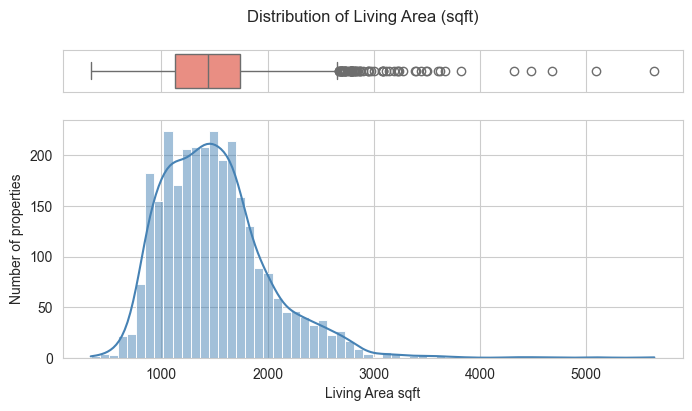

In [18]:
# Visualizing the living area
plot_dist(df, columns="Gr_Liv_Area", title="Distribution of Living Area (sqft)",
          xlabel="Living Area sqft", ylabel="Number of properties")

Similar observations can be made to what were in the special notes in the data dictionary. There are clear outliers in this dataset, finding houses with more than 4,000 sqft is highly unlikely. To confirm this we will follow the special notes and check the distribution between the "Sale Price" and "GR Liv Area".

Looking at the visualization above, we can also conclude that the data in the dataframe is right skewed, this could most likely be due to the outliers and other large properties

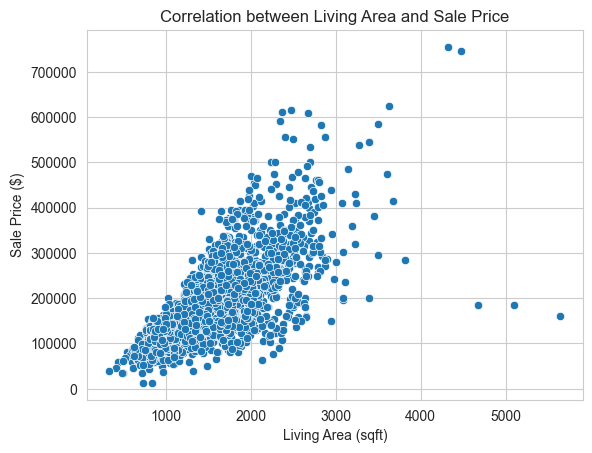

In [19]:
sns.scatterplot(data=df, x="Gr_Liv_Area", y="SalePrice")
plt.title("Correlation between Living Area and Sale Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price ($)");

Looking at the graph above, we can share the same conclusions with the special note that we should drop houses with a Gr Living Area greater than 4000.
We see that 3 properties have really high living areas > 4000 but low sale prices, and secondly, 2 more properties with > 4000 living area and really high sales prices.

In [20]:
df.drop(df[df["Gr_Liv_Area"]>4000].index, inplace=True)

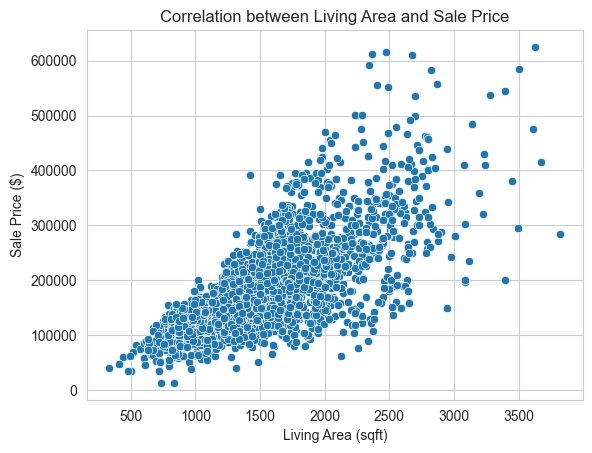

In [21]:
sns.scatterplot(data=df, x="Gr_Liv_Area", y="SalePrice")
plt.title("Correlation between Living Area and Sale Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price ($)");

Summary statistics:
count      2934.000000
mean      10103.324131
std        7770.118552
min        1300.000000
25%        7442.250000
50%        9432.000000
75%       11500.000000
max      215245.000000
Name: Lot_Area, dtype: float64


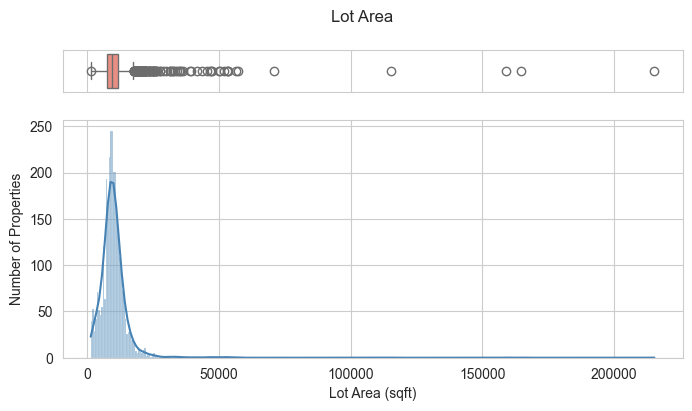

In [22]:
# Looking for outliers within Lot Area
plot_dist(df, columns="Lot_Area", title="Lot Area",
          xlabel="Lot Area (sqft)", ylabel="Number of Properties")

From the graph above, we can see that there are multiple outliers as the 75th percentile lot areas within the data is 11,500 sqft but there are a few more properties all the way up to and above 200,000 sqft.

We will drop all properties that are outside 99.7% of the data or greater than 3 standard deviations away from the mean. The use of 99.7% or a Z_Score of 3 is a statistically used method to identify outliers within any dataset (BecomingHuman.ai, 2020).

Summary statistics:
count     2908.000000
mean      9617.009285
std       3990.956544
min       1300.000000
25%       7420.000000
50%       9375.000000
75%      11425.250000
max      33120.000000
Name: Lot_Area, dtype: float64


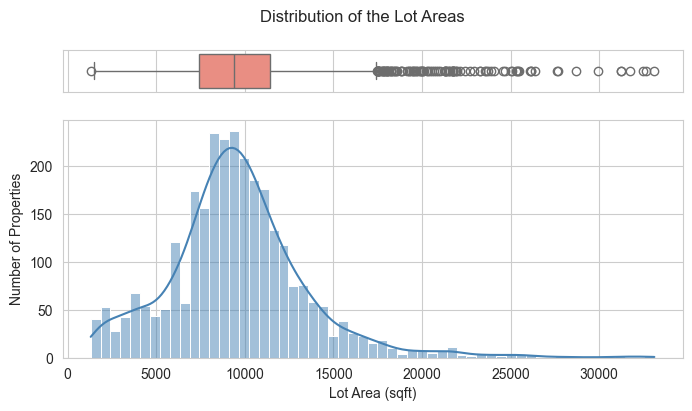

In [23]:
# Calculating the Z-scores for Lot_Area
z_score = stats.zscore(df["Lot_Area"])

# Setting threshold
z_score_threshold = 3

# Outliers
lot_area_outliers = abs(z_score) > z_score_threshold

# Removing outliers
df = df[~lot_area_outliers]

# Graphing the plot to see changes
plot_dist(df, columns="Lot_Area", title="Distribution of the Lot Areas",
          xlabel="Lot Area (sqft)", ylabel="Number of Properties")

From the new plot above and summary statistics we see that the maximum lot area has drastically dropped from 215,000 sqft to 33,000 sqft. This ensures that all the properties within the dataset fall within 99.7% of the dataset.

From the above plots we can now accurately see the plot is right skewed and can also see clearly where the 50% percentile of the data falls, close to 10,000 sqft.
Doing so has also reduced the number of properties in our dataset from 2934 to 2908.
We can also be comfortable with the change as the summary statistics for the lot_area will be more accurate and representative of the data. without such massive outliers.

#### 3.2. Checking for missing values
This section of the report will look at the missing values within the dataset and how to deal with them.

In [24]:
# Total number of NA values
df.isna().sum().sum()

15625

The total number of NA values in our merged dataset is 15,626. This is due to most likely have more than 1 NA value in each row. 

We will deal with the NA in different ways depending on the column:
1. Either drop the NA values
2. Impute the missing values
3. Do nothing to them

In [25]:
# Columns with na values
nan_columns = df.columns[df.isna().any()].tolist()

# Sum of the na values in the dataset
nan_values = df[nan_columns].isna().sum()

# Percentage of na values
nan_percentage = (nan_values / len(df)) * 100

# Creating a dataframe to display the results
nan_df = pd.DataFrame({"NA values": nan_values,
                       "Percentage of NA values": nan_percentage})
nan_df

,NA values,Percentage of NA values
Lot_Frontage,479,16.471802
Alley,2710,93.191197
Mas_Vnr_Type,1758,60.453920
Mas_Vnr_Area,23,0.790922
Bsmt_Qual,78,2.682256
Bsmt_Cond,78,2.682256
Bsmt_Exposure,81,2.785420
BsmtFin_Type_1,78,2.682256
BsmtFin_SF_1,1,0.034388
BsmtFin_Type_2,79,2.716644


Looking at the above dataframe, we can see the amount of NA values in the dataset as well as its proportion to the whole dataset. 
For this project, we will drop all columns with more than 10% of NA values. This is because we have a large dataset and imputing over them will cause a lot of noise in the data.


In [26]:
# Dropping columns with more than 10% of NA values
# Columns to drop
columns_to_drop = nan_df[nan_df["Percentage of NA values"] > 10].index.tolist()
print(columns_to_drop)

# Drop columns
housing_df.drop(columns=columns_to_drop, inplace=True)

print(f"Number of columns in the dataset was: {len(housing_df.columns) + len(columns_to_drop)}")
print(f"Number of columns to drop is: {len(columns_to_drop)}")
print(f"Number of columns in the updated dataset is: {len(housing_df.columns)}")

['Lot_Frontage', 'Alley', 'Mas_Vnr_Type', 'Fireplace_Qu', 'Pool_QC', 'Fence', 'Misc_Feature']
Number of columns in the dataset was: 81
Number of columns to drop is: 7
Number of columns in the updated dataset is: 74


In [27]:
# Update nan_df 
nan_df = nan_df[~nan_df.index.isin(columns_to_drop)]

# Updating the original df
df = df.drop(columns=columns_to_drop)

# Checking the shape of the df
df.shape

(2908, 77)

Looking at the shape of the original df, we can see that the number of columns has dropped from 81 to 71. This is because we dropped 10 columns that had more than 10% of NA values. 


##### 3.2.1 Columns to leave as is

From the above dataframe, there are still columns with missing values but they account for less than 5% of the dataset within each column. Rather than dropping these columns, we will try interpolate the missing values. 

The missing values will be dealt with on a column by column basis as it makes sense for some columns to have no values within them.

The first set of missing values we will deal with are columns that are correctly labelled as NA.
How we identified columns labeled as NA, is by going through the data dictionary provided and seeing if any columns were meant to have an NA value (eg. If property had no basement, the basement columns would be NA)

In [28]:
# Correctly labelled NA values
col_list = ["Bsmt_Qual","Bsmt_Cond","Bsmt_Exposure","BsmtFin_Type_1",
            "BsmtFin_Type_2","Garage_Type","Garage_Finish","Garage_Qual",
            "Garage_Cond"]

# Remove the columns from the nan_df
nan_df = nan_df[~nan_df.index.isin(col_list)]

# View the updated df
nan_df


,NA values,Percentage of NA values
Mas_Vnr_Area,23,0.790922
BsmtFin_SF_1,1,0.034388
BsmtFin_SF_2,1,0.034388
Bsmt_Unf_SF,1,0.034388
Total_Bsmt_SF,1,0.034388
Electrical,1,0.034388
Bsmt_Full_Bath,1,0.034388
Bsmt_Half_Bath,1,0.034388
Garage_Yr_Blt,159,5.467675
Garage_Cars,1,0.034388


Based of the updated dataframe, we can see that the columns above consist of values that can now be imputed with the correct values.
The 2 main imputation methods we will use will be either:
1. Mean
2. Median


##### 3.2.2 Imputing missing values
Kumar (2023) gives us a guide on which method to use for imputing missing values depending on the type of data we have.
- **Mean Imputation**  is used for continuous data that is normally distributed
- **Median Imputation** is used for continuous data that is skewed as it is less sensitive to outliers
- **Mode Imputation** is used for categorical data

In [42]:
# Median Imputation
median_cols = ["Mas_Vnr_Area", "Garage_Yr_Blt", "Electrical",
               "Bsmt_Full_Bath", "Bsmt_Half_Bath", "Garage_Cars"]

for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)
    
df[median_cols].isna().sum()

Mas_Vnr_Area     0
Garage_Yr_Blt    0
dtype: int64

From the above output we can see that the missing values in the columns have been imputed with the median values and we no longer have NA values present. 

We chose to use median imputation for these columns as for the "Garage_Yr_Blt" column, it made most sense to fill it with a year that was within the dataset rather than a year that was not present in the dataset (mean year which can be e.g. 2000.5 or 2000.2).

That was the same reasoning used for the selection of the other columns as they were discrete and we would expect similar discrete values to be present in the dataset after imputation.

In [29]:
# Mean Imputation
mean_cols = ["BsmtFin_SF_1", "BsmtFin_SF_2", "Bsmt_Unf_SF", "Total_Bsmt_SF", "Garage_Area"]
          
for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace=True)
    
df[mean_cols].isna().sum()

BsmtFin_SF_1     0
BsmtFin_SF_2     0
Bsmt_Unf_SF      0
Total_Bsmt_SF    0
Garage_Area      0
dtype: int64

From the above output we can see that the missing values in the columns have been imputed with the mean values and we no longer have NA values present.
We decided to use mean imputation for these columns as they were continuous (this  and we would expect similar continuous values to be present in the dataset after imputation.

#### 3.3 Checking for duplicates

This stage of the data preparation will look at a few columns to see if there are any duplicates within the dataset.

In [30]:
df["PID"].duplicated().sum()

9

In [31]:
# Print out the duplicated PID values
df[df.duplicated(subset=["PID","Year_Built","Yr_Sold"], keep=False)]

,Order_x,PID,MS_SubClass_x,MS_Zoning,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,Order_y,MS_SubClass_y,SalePrice
145,146,535175070,20,RL,9300,Pave,Reg,Lvl,AllPub,Inside,...,143,0,0,4,2010,WD,Normal,146,20,167500
146,146,535175070,20,RL,9300,Pave,Reg,Lvl,AllPub,Inside,...,143,0,0,4,2010,WD,Normal,146,20,167500
147,146,535175070,20,RL,9300,Pave,Reg,Lvl,AllPub,Inside,...,143,0,0,4,2010,WD,Normal,146,20,167500
148,146,535175070,20,RL,9300,Pave,Reg,Lvl,AllPub,Inside,...,143,0,0,4,2010,WD,Normal,146,20,167500
149,147,535175180,20,RL,10725,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,5,2010,WD,Normal,147,20,108538
150,147,535175180,20,RL,10725,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,5,2010,WD,Normal,147,20,108538
151,147,535175180,20,RL,10725,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,5,2010,WD,Normal,147,20,108538
152,147,535175180,20,RL,10725,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,5,2010,WD,Normal,147,20,108538
153,148,535179020,20,RL,10032,Pave,Reg,Lvl,AllPub,Inside,...,160,0,0,6,2010,WD,Normal,148,20,159500
154,148,535179020,20,RL,10032,Pave,Reg,Lvl,AllPub,Inside,...,160,0,0,6,2010,WD,Normal,148,20,159500


Looking at the analysis above, we can see that there are 3 duplicated PID values. 
After analysing the duplicated columns, we see that the duplicated values are entirely identical across  all columns and this duplication occurred mostly during the merging of the 2 datasets.

We will therefore drop these rows from the dataset and keep only the first instance of the duplicated rows as it will not impact our analysis of the data. 

In [32]:
# Dropping the duplicated rows except the first instance
df.drop_duplicates(subset=["PID","Year_Built","Yr_Sold","SalePrice"], keep="first", inplace=True)

# Checking if the duplicates have been dropped
df["PID"].duplicated().sum()

0

#### 3.4. Data Transformation

This stage of the project will look at:
- Converting data types
- Creating new columns from the already existing ones



## References

BecomingHuman.ai (2020) Outlier detection in real estate data, Medium. Available at: https://becominghuman.ai/outlier-detection-in-real-estate-data-4e7375e2c8ba (Accessed: 05 November 2023). 

Kumar, A. (2023) Python - replace missing values with mean, median &amp; mode, Analytics Yogi. Available at: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/ (Accessed: 11 November 2023). 

